In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tqts.quantizer.paa import PAA
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
DATA_DIR = "../data/"
IMG_DIR = "../images/"

### Non-Stationary

In [9]:
etth2 = pd.read_csv(DATA_DIR + 'electricity/electricity.csv', index_col=0)

In [10]:
etth2.head()

,0,1,2,3,4,5,6,7,8,9,...,311,312,313,314,315,316,317,318,319,OT
date,,,,,,,,,,,,,,,,,,,,,
2016-07-01 02:00:00,14.0,69.0,234.0,415.0,215.0,1056.0,29.0,840.0,226.0,265.0,...,676.0,372.0,80100.0,4719.0,5002.0,48.0,38.0,1558.0,182.0,2162.0
2016-07-01 03:00:00,18.0,92.0,312.0,556.0,292.0,1363.0,29.0,1102.0,271.0,340.0,...,805.0,452.0,95200.0,4643.0,6617.0,65.0,47.0,2177.0,253.0,2835.0
2016-07-01 04:00:00,21.0,96.0,312.0,560.0,272.0,1240.0,29.0,1025.0,270.0,300.0,...,817.0,430.0,96600.0,4285.0,6571.0,64.0,43.0,2193.0,218.0,2764.0
2016-07-01 05:00:00,20.0,92.0,312.0,443.0,213.0,845.0,24.0,833.0,179.0,211.0,...,801.0,291.0,94500.0,4222.0,6365.0,65.0,39.0,1315.0,195.0,2735.0
2016-07-01 06:00:00,22.0,91.0,312.0,346.0,190.0,647.0,16.0,733.0,186.0,179.0,...,807.0,279.0,91300.0,4116.0,6298.0,75.0,40.0,1378.0,191.0,2721.0


In [12]:
etth2.shape

(26304, 321)

<Axes: xlabel='date'>

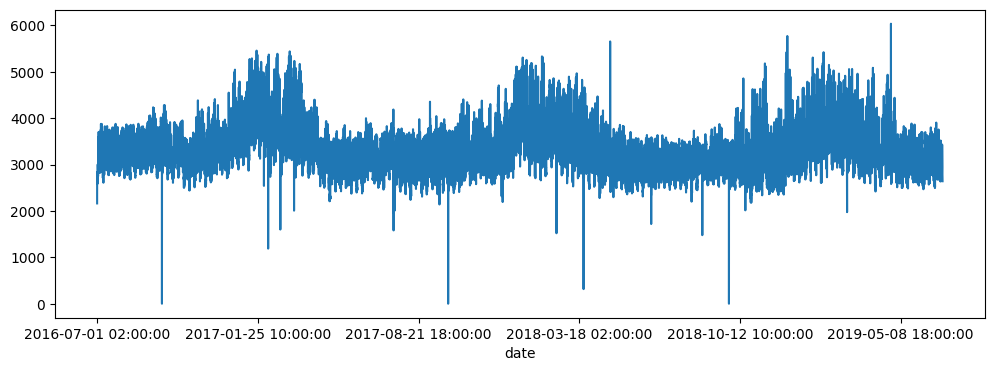

In [13]:
plt.figure(figsize=(12,4))
etth2['OT'].plot()

In [14]:
scaler = MinMaxScaler()
timeseries = etth2['OT']
scaled_etth2 = scaler.fit_transform(timeseries.values.reshape(-1, 1))

<Axes: xlabel='date'>

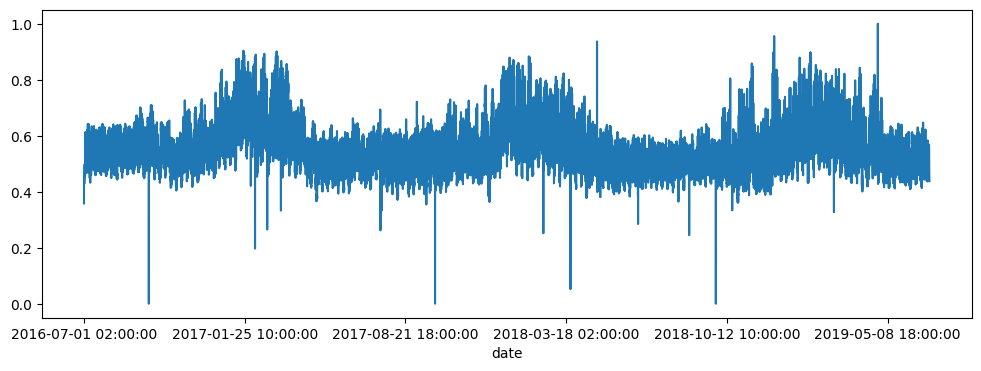

In [15]:
scaled_etth2 = pd.Series(scaled_etth2.flatten(), index=timeseries.index)
plt.figure(figsize=(12,4))
scaled_etth2.plot()

In [16]:
from tqts.quantizer.kernel_sax import KernelSAX

Epoch 1, Boundaries delta: 0.5017851564, Codewords delta: 0.2007293358
Epoch 2, Boundaries delta: 0.0773473484, Codewords delta: 0.0432208653
Epoch 3, Boundaries delta: 0.0424749135, Codewords delta: 0.0272744277
Epoch 4, Boundaries delta: 0.0265040954, Codewords delta: 0.0195715710
Epoch 5, Boundaries delta: 0.0181877508, Codewords delta: 0.0151233351
Epoch 6, Boundaries delta: 0.0134188992, Codewords delta: 0.0119055921
Epoch 7, Boundaries delta: 0.0102393561, Codewords delta: 0.0094696495
Epoch 8, Boundaries delta: 0.0082123683, Codewords delta: 0.0075946704
Epoch 9, Boundaries delta: 0.0067652323, Codewords delta: 0.0062350790
Epoch 10, Boundaries delta: 0.0056866253, Codewords delta: 0.0054611641
Epoch 11, Boundaries delta: 0.0049960484, Codewords delta: 0.0048351900
Epoch 12, Boundaries delta: 0.0045100808, Codewords delta: 0.0043259999
Epoch 13, Boundaries delta: 0.0041051707, Codewords delta: 0.0039063359
Epoch 14, Boundaries delta: 0.0037623338, Codewords delta: 0.0035557834
E

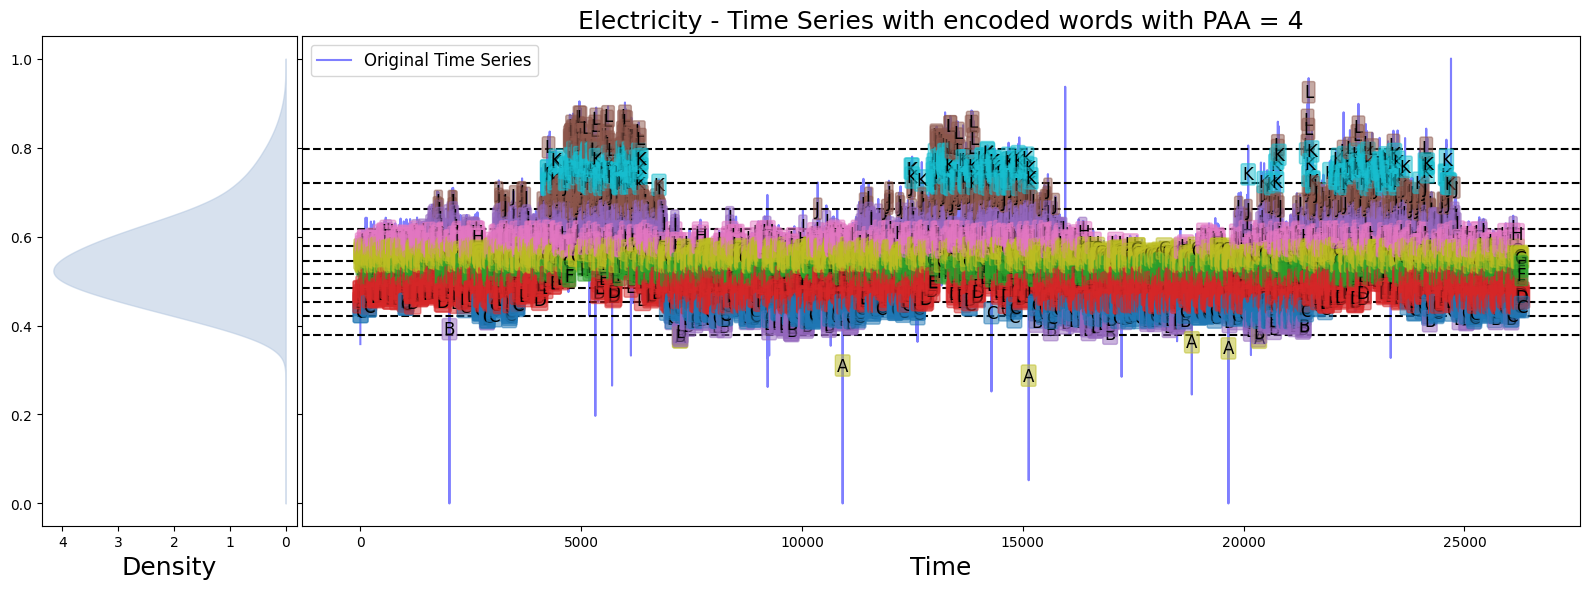

In [17]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=4)
kernel_sax.fit(scaled_etth2.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="electricity/electricity_ksax.png", data_name='Electricity')
kernel_sax.text_to_df(start_datetime=str(etth2.index[0]), csv_path=DATA_DIR+"electricity/electricity_ksax.csv")

### Stationary

In [18]:
target = etth2['OT']
target = target.diff().dropna()

In [19]:
target.head()

date
2016-07-01 03:00:00    673.0
2016-07-01 04:00:00    -71.0
2016-07-01 05:00:00    -29.0
2016-07-01 06:00:00    -14.0
2016-07-01 07:00:00     21.0
Name: OT, dtype: float64

Epoch 1, Boundaries delta: 1371.6206593857, Codewords delta: 2165.7898595515
Epoch 2, Boundaries delta: 1501.6839457301, Codewords delta: 44.3328536622
Epoch 3, Boundaries delta: 37.4485043768, Codewords delta: 14.3104575643
Epoch 4, Boundaries delta: 14.2345010904, Codewords delta: 6.0786365229
Epoch 5, Boundaries delta: 4.0102365775, Codewords delta: 0.8372489484
Epoch 6, Boundaries delta: 0.8413766671, Codewords delta: 0.4553703636
Epoch 7, Boundaries delta: 0.4630540338, Codewords delta: 0.7316811323
Epoch 8, Boundaries delta: 0.3990988012, Codewords delta: 0.6759000965
Epoch 9, Boundaries delta: 0.5038305966, Codewords delta: 0.7096570788
Epoch 10, Boundaries delta: 0.3870858273, Codewords delta: 0.7747592029
Epoch 11, Boundaries delta: 0.6229448701, Codewords delta: 0.6470630427
Epoch 12, Boundaries delta: 0.3529406117, Codewords delta: 0.1817822406
Epoch 13, Boundaries delta: 0.1679913864, Codewords delta: 0.1157146539
Epoch 14, Boundaries delta: 0.1224933331, Codewords delta: 0

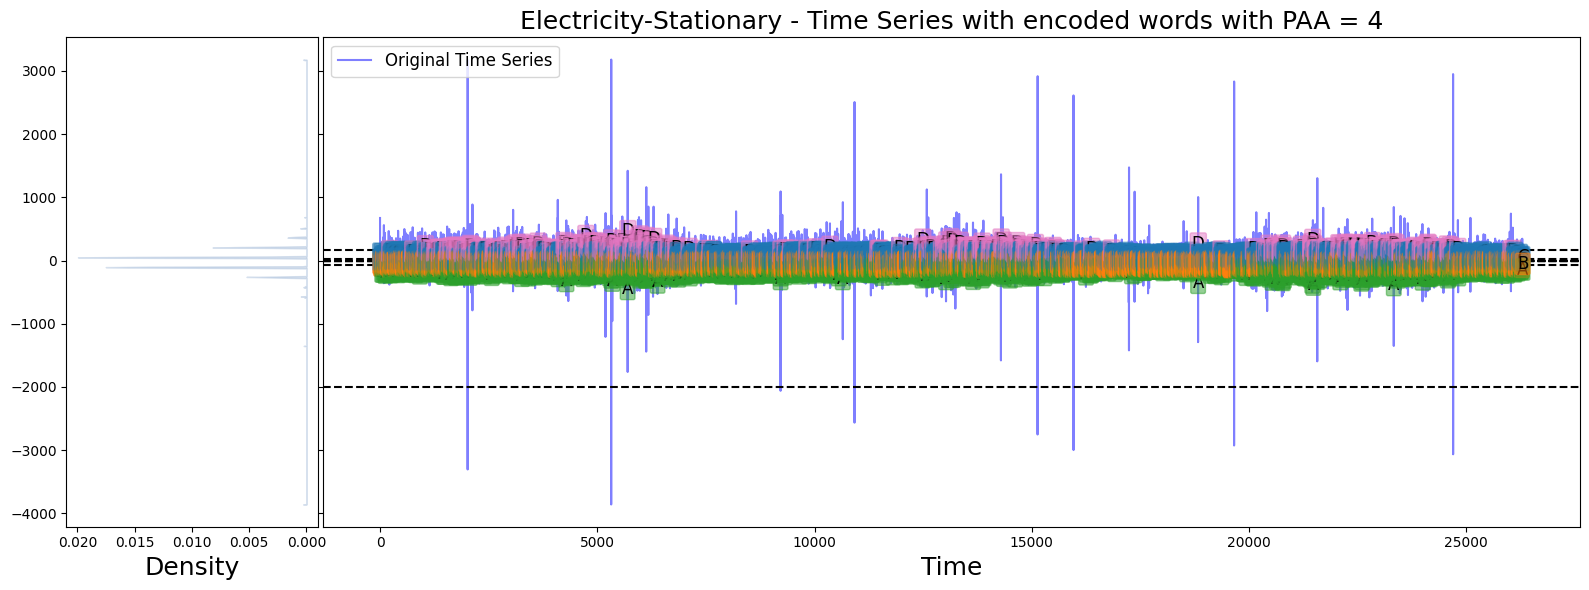

In [20]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=4)
kernel_sax.fit(target.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="electricity/electricity_stationary_ksax.png", data_name='Electricity-Stationary')
kernel_sax.text_to_df(start_datetime=str(etth2.index[0]), csv_path=DATA_DIR+"electricity/electricity_stationary_ksax.csv")